In [147]:
# to do : try to get period and frequency on same axis
# to do : interpolation of the window function needs improvement, maybe you need to write the code as a delta function

In [148]:
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq
import astropy.units as u
from astropy.timeseries import LombScargle

In [149]:
data = pd.read_csv('../Radvel_MCMC/CK00367_default_data.csv')
t_n = np.floor(data['time'].to_numpy())-2450000 # just get the days
times = np.arange(t_n[0]-1, t_n[-1]+2,1)

In [150]:
def W(t):
    if t in t_n:
        return 1
    else:
        return 0

In [151]:
# compute window function 
window = [W(i) for i in times]
window = window/np.sum(window) # normalize

# get higher resolution
from scipy import interpolate
f = interpolate.interp1d(times,window)
times_res = np.arange(t_n[0]-1, t_n[-1]+2,0.05)[:-50]
window_res = f(times_res)

# compute fourier transform
yf = scipy.fft(window)[1:]
xf = fftfreq(len(window))[1:]
xf_to_days = 1/xf

<ipython-input-151-8847ce49e62b>:12: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  yf = scipy.fft(window)[1:]


(-0.0016666666666666668, 0.0016666666666666668)

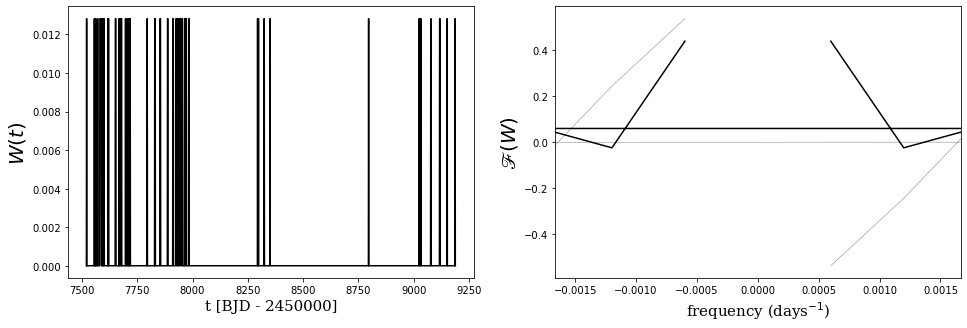

In [152]:
# fourier transform of window function
fig,ax=plt.subplots(1,2,figsize=(16,5))

ax[0].plot(times, window,color='k')
ax[0].set_ylabel(r'$W(t)$', fontsize=20, family='serif')
ax[0].set_xlabel('t [BJD - 2450000]',fontsize=15,family='serif')

ax[1].plot(xf,np.imag(yf),color='grey', linestyle='-',linewidth=0.5)
ax[1].plot(xf,np.real(yf),'k-')


ax[1].set_ylabel('$\mathscr{F}(W)$', fontsize=20, family='serif')
ax[1].set_xlabel('frequency (days$^{-1}$)',fontsize=15,family='serif')
ax[1].set_xlim(-1/600,1/600)


Text(0.5, 0, 'Period = 1/freq (days)')

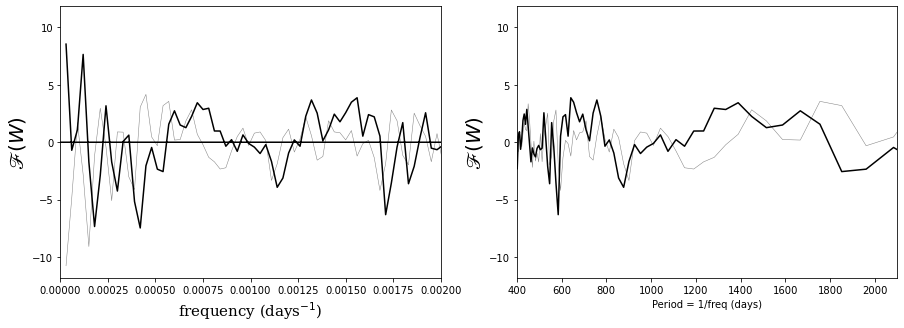

In [146]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(xf,np.imag(yf),color='grey', linestyle='-',linewidth=0.5)
plt.plot(xf,np.real(yf),'k-')
plt.xlim(0,0.002);plt.ylabel('$\mathscr{F}(W)$', fontsize=20, family='serif')
plt.xlabel('frequency (days$^{-1}$)',fontsize=15,family='serif')

plt.subplot(122)
plt.plot(xf_to_days,np.imag(yf),color='grey', linestyle='-',linewidth=0.5)
plt.plot(xf_to_days,np.real(yf),'k-')
plt.xlim(400,2100);plt.ylabel('$\mathscr{F}(W)$', fontsize=20, family='serif')
plt.xlabel('Period = 1/freq (days)')

(0.0, 2000.0)

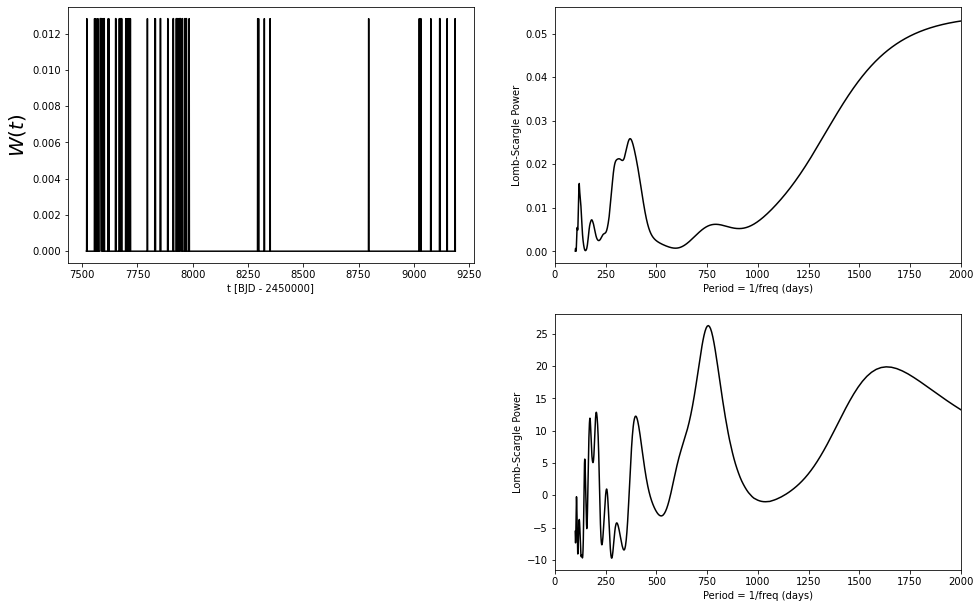

In [26]:
# lomb-scargle periodogram of window function (equivalent to converting positive freq to days in FT)
t = times
y = window

plt.figure(figsize=(16,16))
#plt.subplot(321)
#plt.subplot(322)
#plt.subplot(325)

plt.subplot(323)
plt.plot(t,y,'k-')
plt.ylabel(r'$W(t)$', fontsize=20, family='serif')
plt.xlabel('t [BJD - 2450000]')

plt.subplot(324)
frequency = np.linspace(1/2100., 1/100., 10000)
power = LombScargle(t, y).power(frequency)
period = 1/frequency
plt.plot(period,power,'k-')
plt.ylabel('Lomb-Scargle Power')
plt.xlabel('Period = 1/freq (days)')
plt.xlim(0,2000)

plt.subplot(326)
# load data from periodogram
pdata = pd.read_csv('../Radvel_RVsearch/rvsearch_P100/pers_periodograms.csv',delimiter=' ')
p = pdata['#'].to_numpy()
dbic = pdata['period'].to_numpy()
plt.plot(p,dbic,'k-')
plt.ylabel('Lomb-Scargle Power')
plt.xlabel('Period = 1/freq (days)')
plt.xlim(0,2000)


In [15]:
1/600.

0.0016666666666666668